In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=x_train/255

In [6]:
x_train=x_train.reshape(-1,28,28,1)*2.-1.

In [9]:
only_zeros=x_train[y_train==0]

In [10]:
import tensorflow as tf

In [11]:
batch_size=32

In [12]:
datasets=tf.data.Dataset.from_tensor_slices(only_zeros).prefetch(1)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [13]:
dataset=datasets.batch(batch_size,drop_remainder=True).shuffle(buffer_size=1000)

In [15]:
dataset

<_ShuffleDataset element_spec=TensorSpec(shape=(32, 28, 28, 1), dtype=tf.float64, name=None)>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape,Conv2D,Conv2DTranspose,BatchNormalization,LeakyReLU,Dropout

In [17]:
discriminator=Sequential()
discriminator.add(Conv2D(64,kernel_size=(4,4),padding='same',strides=(2,2),input_shape=[28,28,1],activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128,kernel_size=(4,4),padding='same',strides=(2,2),activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [18]:
coding_size=100

In [21]:
generator=Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[coding_size]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [22]:
discriminator.trainable=False

In [23]:
GAN=Sequential([generator,discriminator])

In [24]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
epochs=20

In [26]:
generator,discriminator=GAN.layers
for epoch in range(epochs):
    x=0
    for x_batch in dataset:
        x+=1
        noise=tf.random.normal([batch_size,coding_size])
        gen=generator(noise)
        real_vs_fake=tf.concat([gen,tf.dtypes.cast(x_batch,tf.float32)],axis=0)
        y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable=True
        discriminator.train_on_batch(real_vs_fake,y1)
        discriminator.trainable=False
        noise=tf.random.normal([batch_size,coding_size])
        y2=tf.constant([[1.0]]*batch_size)
        GAN.train_on_batch(noise,y2)

2023-04-14 21:45:47.537581: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [27]:
noise=tf.random.normal([10,coding_size])

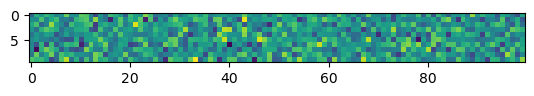

In [28]:
plt.imshow(noise)

In [30]:
image=generator(noise)

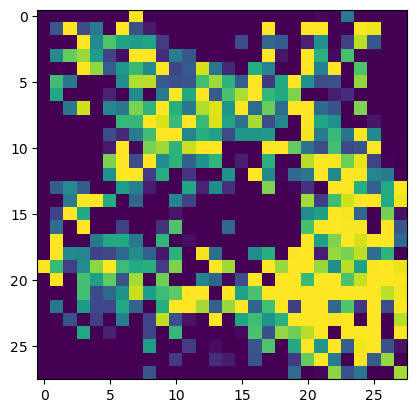

In [32]:
plt.imshow(image[0].numpy().reshape(28,28))

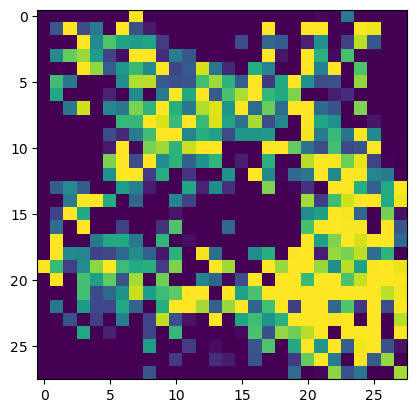

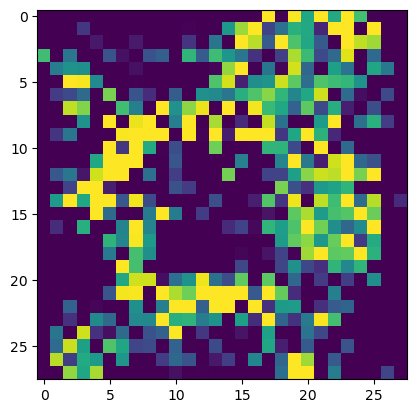

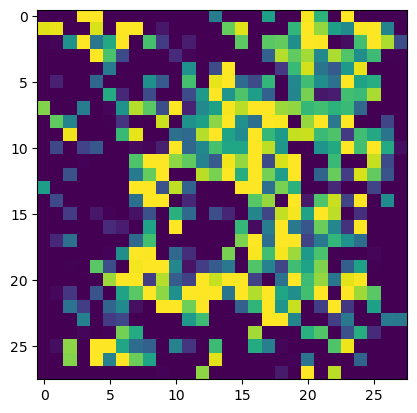

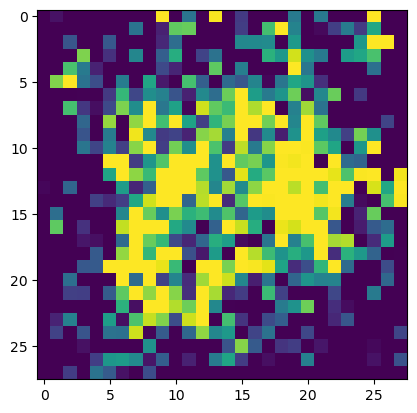

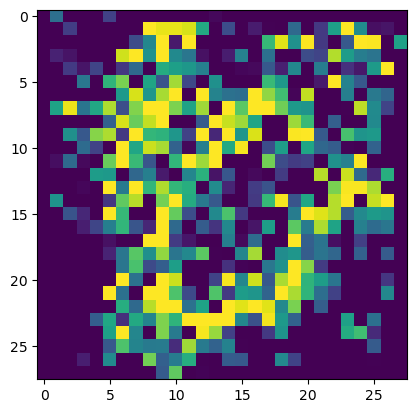

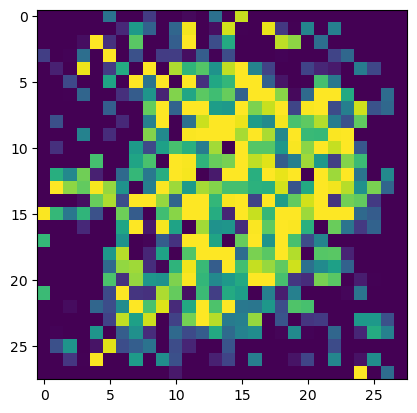

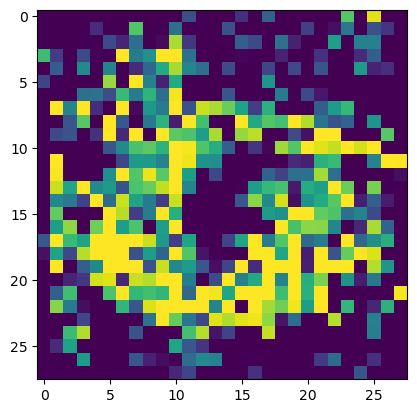

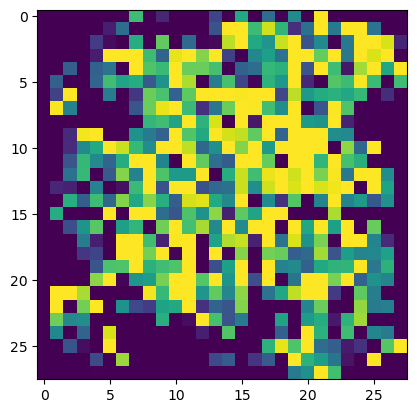

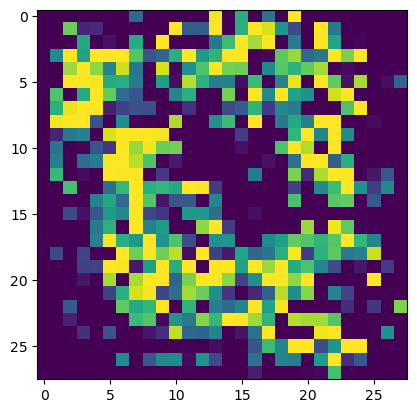

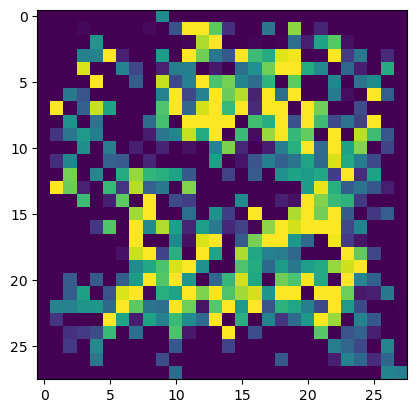

In [34]:
for img in image:
    plt.imshow(img.numpy().reshape(28,28))
    plt.show()